# Multi-class and Multi-distribution Dataset Example

Here we show usage examples for `generate_multiclass_multidistribution_dataset`, one of the most generic and powerful functions in `pydatapull`'s `basicml` module.

This function accepts the following parameters as input.

* `n_samples_per_class`: we will call this $N_S$ here. This is the number of samples for each class in the dataset to be generated.
* `mu_matrix_list`: we will call this $\mathcal{M}$ here. This is a $K$-element list of matrices, $\boldsymbol{\mathrm{M}_k}$ each of size $L_k \times M$.
* `sigma_matrix_list`: we will call this $\mathcal{S}$ here. This is a $K$-element list of matrices, $\boldsymbol{\Sigma_k}$, each of size $L_k \times M$.
* `choice_probabilities_list`: we will call this $\mathcal{P}$ here. This is a $K$-element list of vectors, $p$, each of length $L_k$.
* `label_list`: $K$-element this is a list of labels for each class.

Here we break each parameter down.

## `n_samples_per_class`

This parameter defines the number of samples drawn for each class, $N_S$. If $N_S=1000$ and there are 3 classes, the dataset will have $3000$ samples.

## `mu_matrix_list`

The list $\mathcal{M}$ defines a $K$-element list of matrices.

$$
\mathcal{M} = \{ \boldsymbol{\mathrm{M}_1},\ \cdots,\ \boldsymbol{\mathrm{M}_K} \}
$$

Each matrix $\boldsymbol{\mathrm{M}_k}$ in this list is of size $L_k \times M$, and defines the means of $L_k$ $M$-dimensional normal distributions.

These matrices must have the same number of columns $M$ (since each distribution must be sampled from $M$-dimensional space) but may have any number of rows $L_k$ (since each distribution can have any number of normal components).

For example, the matrix $\boldsymbol{\mathrm{M}_1}$ can define a $3$-dimensional distribution with 4 normal components.
$$
\boldsymbol{\mathrm{M}_1} =
\begin{pmatrix}
\mu^{(1)}_{x1} & \mu^{(1)}_{y1} & \mu^{(1)}_{z1} \\
\mu^{(1)}_{x2} & \mu^{(1)}_{y2} & \mu^{(1)}_{z2} \\
\mu^{(1)}_{x3} & \mu^{(1)}_{y3} & \mu^{(1)}_{z3} \\
\mu^{(1)}_{x4} & \mu^{(1)}_{y4} & \mu^{(1)}_{z4}
\end{pmatrix}
$$

The next matrix $\boldsymbol{\mathrm{M}_2}$ must have the same number of dimensions (3) but can have any number of components (rows).

$$
\boldsymbol{\mathrm{M}_2} =
\begin{pmatrix}
\mu^{(2)}_{x1} & \mu^{(2)}_{y1} & \mu^{(2)}_{z1} \\
\mu^{(2)}_{x2} & \mu^{(2)}_{y2} & \mu^{(2)}_{z2} \\
\end{pmatrix}
$$

The $\mathcal{M}$ list will then define a two class dataset in 3 dimensions (3 features per class) where the first class has $4$ normal components and the second class has $2$ normal components.


## `sigma_matrix_list`

The list $\mathcal{S}$ defines a $K$-element list of matrices. It must have the same number of elements, $K$, as $\mathcal{M}$.

$$
\mathcal{S} = \{ \boldsymbol{\Sigma_1},\ \cdots,\ \boldsymbol{\Sigma_K} \}
$$

Each matrix $\boldsymbol{\Sigma_k}$ in this list is of size $L_k \times M$, and defines the means of $L_k$ $M$-dimensional normal distributions. Each $\boldsymbol{\Sigma_k}$ must be of the same shape as the corresponding $\boldsymbol{\mathrm{M}_k}$, since they define the standard deviations and means of mixed, multi-dimensional distributions respectively.

For example, since in our example the matrix $\boldsymbol{\mathrm{M}_1}$ defined a $3$-dimensional distribution with 4 normal components, the corresponding matrix $\boldsymbol{\Sigma_1}$ must be of matching shape since it defines the corresponding standard deviations.
$$
\boldsymbol{\Sigma_1} =
\begin{pmatrix}
\sigma^{(1)}_{x1} & \sigma^{(1)}_{y1} & \sigma^{(1)}_{z1} \\
\sigma^{(1)}_{x2} & \sigma^{(1)}_{y2} & \sigma^{(1)}_{z2} \\
\sigma^{(1)}_{x3} & \sigma^{(1)}_{y3} & \sigma^{(1)}_{z3} \\
\sigma^{(1)}_{x4} & \sigma^{(1)}_{y4} & \sigma^{(1)}_{z4}
\end{pmatrix}
$$

The next matrix $\boldsymbol{\Sigma_2}$ defines the standard deviations that correspond to $\boldsymbol{\mathrm{M}_2}$.

$$
\boldsymbol{\Sigma_2} =
\begin{pmatrix}
\sigma^{(2)}_{x1} & \sigma^{(2)}_{y1} & \sigma^{(2)}_{z1} \\
\sigma^{(2)}_{x2} & \sigma^{(2)}_{y2} & \sigma^{(2)}_{z2} \\
\end{pmatrix}
$$

The $\mathcal{M}$ list and the $\mathcal{S}$ list together will then define a two class dataset in 3 dimensions (3 features per class) where the first class has $4$ normal components and the second class has $2$ normal components, with means defined in $\mathcal{M}$ and standard deviations defined in $\mathcal{\Sigma}$.

## `choice_probabilities_list`

When $L$ normal components are defined per class for each of the $K$ classes, we might also want to control how often we draw from each normal component in the mixture. For example, we might want to draw from the first component more often than the second component. `generate_multiclass_multidistribution_dataset` allows us to generate basic hierarchical mixtures like this by defining the probability of drawing from each component of each distribution using the $\mathcal{P}$ list.

$\mathcal{P}$ is a $K$-element list of vectors, $p$, each of length $L_k$. Each element of $\mathcal{P}$ is an $L_k$ length vector whose elements define the probabilities of drawing from each respective distribution defined by the rows of the corresponding $\boldsymbol{M_k}$ and $\boldsymbol{\Sigma_k}$ matrices.

For example, if we want to specify that our $4$ distributions in class 1 are drawn with equal probability then the first vector in the $\mathcal{P}$ list would be

$$
\boldsymbol{p_1} =
\begin{pmatrix}
0.25 & 0.25 & 0.25 & 0.25
\end{pmatrix}.
$$

Then if we wanted to specify the the first distribution in the mixture for our second class is drawn more often we would specify
$$
\boldsymbol{p_1} =
\begin{pmatrix}
0.9 & 0.1
\end{pmatrix}.
$$

## `label_list`

This parameter defines the list of human readable labels for each class. For example:

```python
label_list = ["class 1", "class 2"]
```

## Example: XOR Dataset

The hierarchical mixture defined by the `generate_multiclass_multidistribution_dataset` simplifies to many classical datasets for special values of its parameters. The following values simplify to the XOR function.

$$
\begin{align*}
\mathcal{M} &= \{\boldsymbol{\mathrm{M}_1},\ \boldsymbol{\mathrm{M}_2}\} \\
\mathcal{S} &= \{\boldsymbol{\Sigma_1},\ \boldsymbol{\Sigma_2}\} \\
\mathcal{P} &= \{\boldsymbol{p_1},\ \boldsymbol{p_2}\}
\end{align*}
$$

where

$$
\begin{align*}
&\boldsymbol{\mathrm{M}_1} = \begin{pmatrix} 0 & 0 \\ 1 & 1 \end{pmatrix}, \quad
&\boldsymbol{\mathrm{M}_2} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \\
&\boldsymbol{\Sigma_1} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}, \quad
&\boldsymbol{\Sigma_2} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}, \\
\end{align*}
$$
and
$$
\begin{align*}
\boldsymbol{p_1} = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix}, \quad
\boldsymbol{p_2} = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix}. \\
\end{align*}
$$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

np.random.seed(42)

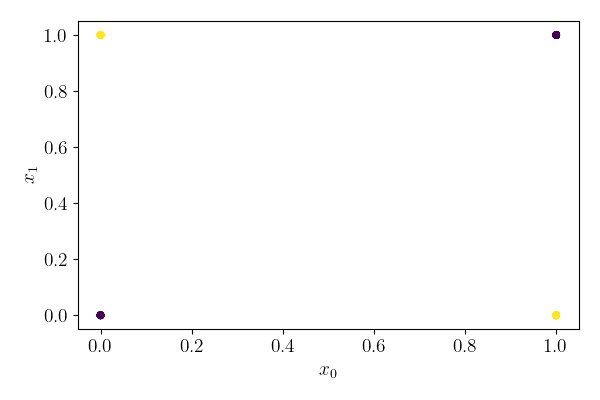

In [2]:
from pydatapull.basicml import generate_multiclass_multidistribution_dataset
from pydatapull.visualizers import scatter_plot_dataset
import numpy as np

n_samples_per_class = 100
mu_a = np.array([[0, 0], [1, 1]])
mu_b = np.array([[0, 1], [1, 0]])
mu_matrix_list = [mu_a, mu_b]
sigma_matrix_list = [np.zeros((2, 2))] * 2
choice_probabilities_list = [np.array([0.5, 0.5])] * 2
labels = ["X1 = X2", "X1 != X2"]

x_features, y_labels = generate_multiclass_multidistribution_dataset(
    n_samples_per_class,
    mu_matrix_list,
    sigma_matrix_list,
    choice_probabilities_list,
    labels,
)

_ = scatter_plot_dataset(x_features, y_labels)

## Example: Noisy XOR

By setting the elements of $\boldsymbol{\Sigma_1}$ and $\boldsymbol{\Sigma_2}$ to positive value we can generate a noisy version of the XOR dataset.

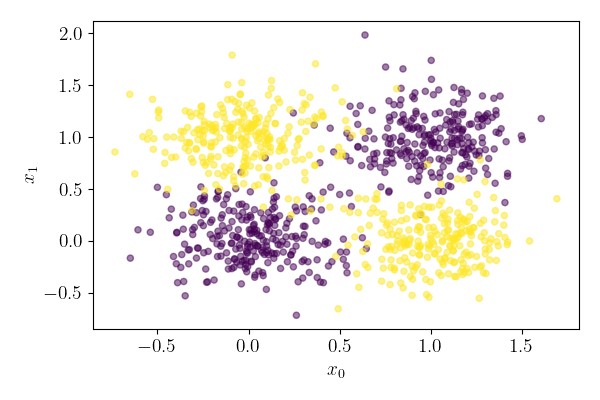

In [3]:
n_samples_per_class = 500
sigma = 0.25

mu_a = np.array([[0, 0], [1, 1]])
mu_b = np.array([[0, 1], [1, 0]])
mu_matrix_list = [mu_a, mu_b]
sigma_matrix_list = [np.full((2, 2), sigma)] * 2
choice_probabilities_list = [np.array([0.5, 0.5])] * 2
labels = ["X1 = X2", "X1 != X2"]

x_features, y_labels = generate_multiclass_multidistribution_dataset(
    n_samples_per_class,
    mu_matrix_list,
    sigma_matrix_list,
    choice_probabilities_list,
    labels,
)

_ = scatter_plot_dataset(x_features, y_labels)

## Example: Inseparable Features

By using the `choice_probabilities_list` we can generate trick features which sometimes are useful, but in other cases lead to fundamental inseparability. These features can challenge some machine learning algorithms.

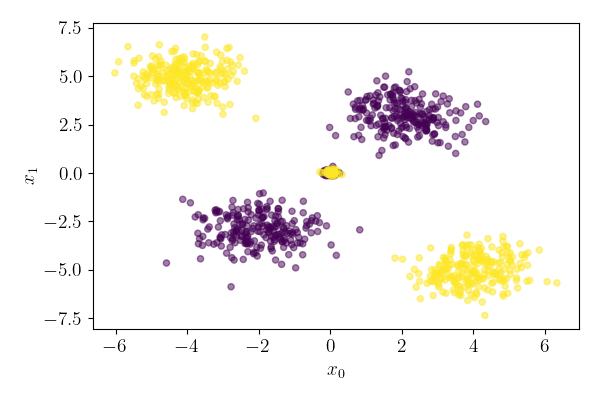

In [4]:
n_samples_per_class = 500
sigma = 0.8

mu_a = np.array([[2, 3], [-2, -3], [0, 0]])
mu_b = np.array([[-4, 5], [4, -5], [0, 0]])
mu_matrix_list = [mu_a, mu_b]
sigma_matrix_list = [
    np.array([[sigma, sigma], [sigma, sigma], [0.1, 0.1]])
] * 2
choice_probabilities_list = [
    np.array([0.45, 0.45, 0.1]),
    np.array([0.45, 0.45, 0.1]),
]
labels = ["X1 = X2", "X1 != X2"]

x_features, y_labels = generate_multiclass_multidistribution_dataset(
    n_samples_per_class,
    mu_matrix_list,
    sigma_matrix_list,
    choice_probabilities_list,
    labels,
)

_ = scatter_plot_dataset(x_features, y_labels)